<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/Problema_del_Viajero_Vendedor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEMA DEL VIAJERO VENDEDOR

In [ ]:
import numpy as np
import pandas as pd

## Algoritmo Genético

In [ ]:
class Genetic_Algorithm ():
  def __init__(self,sizeIndividual, sizePopulation=100, generations=400, mutation_probability=0.1, crossover_probability=0.9, cin = 1, ctotal = [1,2,3,4,5], matriz_ciudades=np.array([[-1,42,0,20,20],[42,-1,12,0,18],[0,12,-1,34,15],[20,0,34,-1,0],[20,18,15,0,-1]])):
    self.sizeIndividual= sizeIndividual
    self.sizePopulation = sizePopulation
    self.generations = generations
    self.mutation_probability=mutation_probability
    self.crossover_probability=crossover_probability
    self.cin = cin
    self.ctotal = ctotal
    self.matriz_ciudades=matriz_ciudades
    
  def fitnessFunct(self,x):
    pass

  def valid(self, x):
    return True
    
  def generateFirstPopulation(self,cin):
    population=[]
    count=0;
    # Creamos una copia de la matriz con todas las ciudades para poder popearlas o removerlas sin afectar a la lista original.
    x=self.ctotal.copy()
    # Removemos la ciudad inicial para que esta no se tenga en cuenta entre las poblaciones a las que se debe de viajar.
    x.remove(cin)
    while True:
      ind = []
      x1 = x.copy()
      for i in range(self.sizeIndividual):
        # Si estamos en la primera o en la última posición, agregamos la ciudad inicial.
        if len(ind) == 0 or len(ind) == self.sizeIndividual-1:
          ind.append(self.cin)
        else:
          posicion = np.random.randint(0, len(x1))
          ind.append(x1[posicion])
          x1.remove(x1[posicion])
      if (self.valid(ind)):
        population.append(ind)
        count=count+1
      # Por último, revisamos si ese trayecto sí es válido según las condiciones que dimos, y agregamos este cromosoma a la población.
      if count==self.sizePopulation:
        return population

  def roulette(self,population):
    of=[self.fitnessFunct(s) for s in population]
    probability=of/sum(of)
    accumulatedProb=np.cumsum(probability)
    return accumulatedProb 

  def selection(self, population, accumulatedProb):
    nr=np.random.uniform()
    for i,p in enumerate(accumulatedProb):
      if nr<p:
        return population[i]

  def crossover(self,ind1, ind2):
    cp=np.random.randint(1,len(ind1)-1)
    ## Create new children.
    child1=ind1[0:cp+1]
    child2=ind2[0:cp+1]
    # Revisamos los faltantes y colocamos los números que no están.
    for i in ind2:
      if i not in child1 and len(child1)<self.sizeIndividual-1:
        child1.append(i)
      elif len(ind1)-len(child1)==1:  
        child1.append(self.cin)
    for i in ind1:
      if i not in child2 and len(child2)<self.sizeIndividual-1:
        child2.append(i)
      elif len(ind2)-len(child2)==1:  
        child2.append(self.cin)
    # Devolvemos los hijos.
    return child1,child2

  def mutate(self,ind):
    # Esta mutación consistirá en alternar un par de posiciones (claramente sin contar la primera y la última).
    child=ind.copy()
    cp1=np.random.randint(1,len(child)-1)
    cp2=np.random.randint(1,len(child)-1)
    while cp1 ==cp2:
      cp1=np.random.randint(1,len(child)-1)
      cp2=np.random.randint(1,len(child)-1)
    else:
      poner_2=child[cp1]
      poner_1=child[cp2]
      child[cp1]=poner_1
      child[cp2]=poner_2
      return child

  def geneticAlgorithm(self):
    # Creamos la primera población.
    population=self.generateFirstPopulation(self.cin)
    # Probabilidad acumulada utilizando la ruleta.
    accumulatedProb=self.roulette(population)
    # El mejor individuo para el caso inicial va a ser el primero de la población.
    self.bestIndividual=[population[0]]
    for i in range(self.generations):
      #Generar la nueva generación.
      nextPopulation=[]
      count=0
      while True: 
        # Hacemos selección de dos individuos de la población anterior, y los iniciamos.
        ind1=self.selection(population, accumulatedProb)
        ind2=self.selection(population, accumulatedProb)
        crossProb=nr=np.random.uniform()
        if crossProb<self.crossover_probability:
          child1,child2=self.crossover(ind1,ind2)
          if self.valid(child1):
            nextPopulation.append(child1)
          if self.valid(child2):
            nextPopulation.append(child2)
        else:
          nextPopulation.append(ind1)
          nextPopulation.append(ind2)
        # Hacemos selección de un individuo y mutación si es posible.
        mutProb=nr=np.random.uniform()
        ind=self.selection(population, accumulatedProb)
        if mutProb<self.mutation_probability:
          child=self.mutate(ind)
          if self.valid(child):
            nextPopulation.append(child)
        else:
          nextPopulation.append(ind)
        if len(nextPopulation)>=self.sizePopulation:
          nextPopulation=nextPopulation[0:self.sizePopulation]
          break;

      # El acumulado es igual a la probabilidad de la nueva población; finalmente ordeno según la función de aptitud, selecciono el mejor individuo de la generación 
      accumulatedProb=self.roulette(nextPopulation)
      sorted_population=sorted(nextPopulation,key=self.fitnessFunct,reverse=True)
      self.bestIndividual.append(sorted_population[0])
      population=nextPopulation
      print(nextPopulation)
    #Finalmente organizo toda la lista de los mejores individuos, y arrojamos el mejor de todos, junto con su función de aptitud.
    sortedBest=sorted(self.bestIndividual,key=self.fitnessFunct,reverse=True)
    print(f"La solución óptima empezando desde {self.cin} es la ruta {sortedBest[0]}, con un recorrido total de {(1/self.fitnessFunct(sortedBest[0]))} unidades")
    return sortedBest[0],self.fitnessFunct(sortedBest[0])

## Clase específica del problema 

In [ ]:
# Ahora creamos la clase en particular del problema del viajero, que hereda atributos y métodos de la clase general de los algoritmos genéticos.
class TravelerProblem(Genetic_Algorithm):
  def __init__(self, sizeIndividual, sizePopulation, generations, mutation_probability,crossover_probability,cin,ctotal,matriz_ciudades):
    super(TravelerProblem, self).__init__(sizeIndividual, sizePopulation, generations, mutation_probability,crossover_probability,cin,ctotal,matriz_ciudades)

  def fitnessFunct(self,x):
    l=[]
    count=0
    for i in range(len(x)):
      l.append(x[i]-1)
    for j in range(len(l)):
      if j<len(l)-1:
        count=self.matriz_ciudades[l[j]][l[j+1]]+count
    return 1/count
  def valid(self,x):
    l=[]
    count=0
    for i in range(len(x)):
      l.append(x[i]-1)
    for j in range(len(l)):
      if j<len(l)-1:
        if self.matriz_ciudades[l[j]][l[j+1]] in [0,-1]:
          count+=1
    return count==0

## Ejecución del problema del viajero

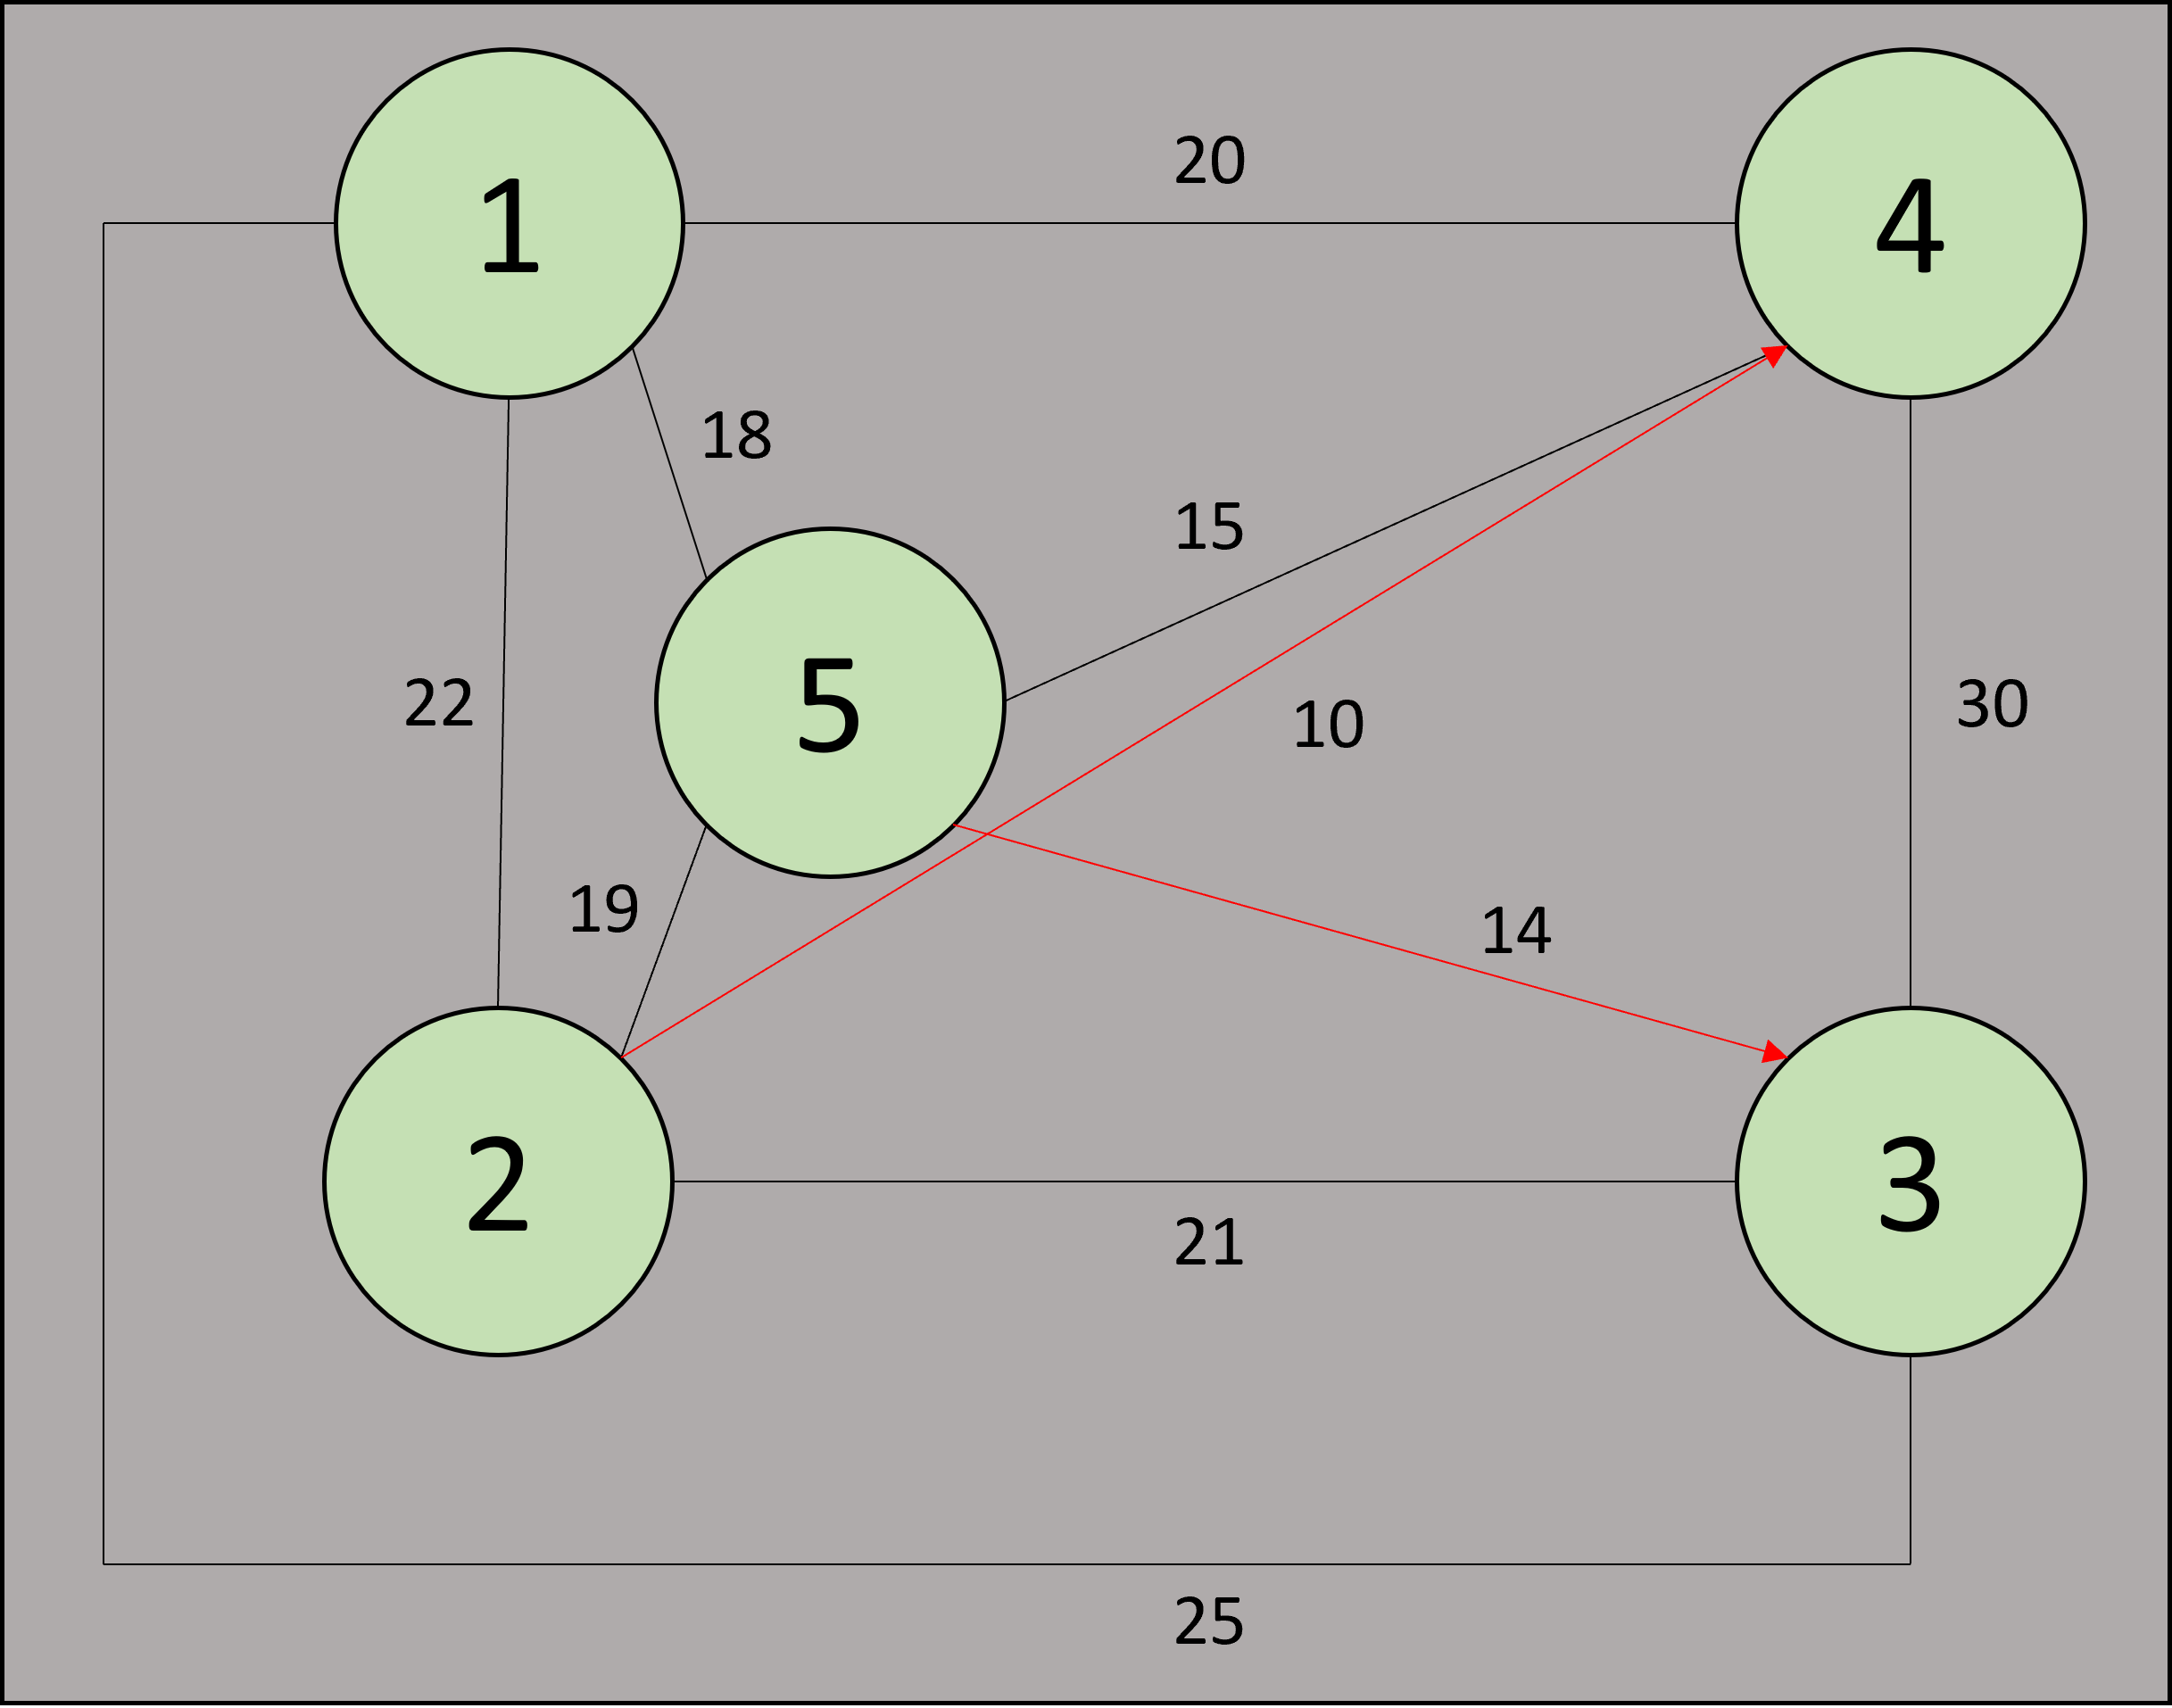

In [ ]:
#@title Parámetros de Entrada Problema del Viajero Vendedor
# Lista con todas las ciudades posibles.
ctotal = [1,2,3,4,5]
# Tamaño del cromosoma, que en este caso es 6.
sizeIndividual = 6 #@param {type:"integer"}
# Costos de ciudades, en nuestro caso es una matriz. Hay algunas rutas de una sola vía.
ciudades= np.array([[-1,22,0,20,18],[22,-1,21,10,19],[25,21,-1,30,0],[20,0,30,-1,15],[18,19,14,15,-1]])
""" Con la siguiente matriz se puede probar que sí existe la recombinación, con la otra es más complejo porque hay menos opciones de viaje"""
#ciudades= np.array([[-1,1,1,1,1],[1,-1,1,1,1],[1,1,-1,1,1],[1,1,1,-1,1],[1,1,1,1,-1]])
# La Ciudad de la que queremos salir
cin = 1
# Cantidad de cromosomas que tendremos por población.
sizePopulation =  20#@param {type:"integer"}
# Generaciones.
generations =  100#@param {type:"integer"}
# Probabilidades de mutación y de cruce.
mutation_probability = 0.1 #@param {type:"number"}
crossover_probability = 0.9 #@param {type:"number"}

In [ ]:
for i in range(5):
  KP=TravelerProblem(sizeIndividual, sizePopulation, generations, mutation_probability, crossover_probability,i+1,ctotal,ciudades)
  solution, f=KP.geneticAlgorithm()
#Como conclusión, vemos que no importa desde qué ciudad se comience, siempre habrá una ruta óptima para conectar las poblaciones, por ende el recorriddo siempre va a ser el mismo, y el único cambio tendrá qué ver con el pivote de inicio.

[[1, 4, 5, 3, 2, 1], [1, 4, 3, 2, 5, 1], [1, 4, 3, 2, 5, 1], [1, 2, 5, 4, 3, 1], [1, 2, 3, 4, 5, 1], [1, 4, 3, 2, 5, 1], [1, 5, 2, 3, 4, 1], [1, 2, 5, 4, 3, 1], [1, 5, 2, 4, 3, 1], [1, 2, 5, 3, 4, 1], [1, 4, 3, 2, 5, 1], [1, 2, 5, 3, 4, 1], [1, 5, 2, 3, 4, 1], [1, 2, 5, 3, 4, 1], [1, 2, 5, 4, 3, 1], [1, 2, 5, 3, 4, 1], [1, 5, 2, 4, 3, 1], [1, 5, 4, 3, 2, 1], [1, 4, 5, 2, 3, 1], [1, 4, 5, 2, 3, 1]]
[[1, 2, 5, 3, 4, 1], [1, 5, 2, 3, 4, 1], [1, 5, 2, 4, 3, 1], [1, 2, 3, 4, 5, 1], [1, 2, 5, 4, 3, 1], [1, 2, 5, 3, 4, 1], [1, 2, 5, 4, 3, 1], [1, 4, 3, 2, 5, 1], [1, 2, 5, 3, 4, 1], [1, 5, 2, 4, 3, 1], [1, 4, 3, 2, 5, 1], [1, 4, 5, 3, 2, 1], [1, 5, 2, 4, 3, 1], [1, 2, 5, 3, 4, 1], [1, 5, 2, 3, 4, 1], [1, 2, 5, 4, 3, 1], [1, 4, 5, 2, 3, 1], [1, 5, 2, 4, 3, 1], [1, 2, 5, 4, 3, 1], [1, 4, 5, 2, 3, 1]]
[[1, 2, 5, 4, 3, 1], [1, 2, 3, 4, 5, 1], [1, 5, 4, 3, 2, 1], [1, 5, 2, 4, 3, 1], [1, 4, 5, 2, 3, 1], [1, 5, 2, 4, 3, 1], [1, 4, 5, 2, 3, 1], [1, 5, 2, 4, 3, 1], [1, 2, 5, 4, 3, 1], [1, 2, 5, 4, 3, 1